#### This is jupyter

* In Jupyter, if you see the symbol In \[\*\], that means that the process is running.
* Or it means that the process is waiting to be run.

In [1]:
# Import libraries
import os
import sys
import subprocess
import h5py
from IPython.display import Image
from IPython.core.display import HTML
import re

In [2]:
# We will be using poretools. Let's see which poretools we are using.
poretools_path = subprocess.check_output("which poretools", shell=True).rstrip()
poretools_version = subprocess.check_output("poretools --version", shell=True, stderr=subprocess.STDOUT).rstrip()
print "The poretools path is %s.\nThe version of poretools is %s" % (poretools_path, poretools_version)

The poretools path is /home/Lucatta/anaconda2/bin/poretools.
The version of poretools is poretools 0.6.0


In [3]:
# Now we need to set our directories:
HOME_DIR = "/home/Lucatta/jupyter_testing/"
SAMPLE_NAME = "2016_08_16_E_COLI_R9"

FAST5_DIR = "/data/Bioinfo/bioinfo-proj-alexis/%s/reads/downloads/pass/" % SAMPLE_NAME
QUALITY_METRICS_DIR = os.path.abspath(HOME_DIR) + "/" + "quality_metrics/"
PLOTS_DIR = os.path.abspath(HOME_DIR) + "/" + "plots/"
METADATA_DIR = os.path.abspath(HOME_DIR) + "/" + "meta/"
STATS_DIR = os.path.abspath(HOME_DIR) + "/" + "stats/"
    
sub_dirs = (QUALITY_METRICS_DIR, PLOTS_DIR, METADATA_DIR, STATS_DIR)
for directory in sub_dirs:
    if not os.path.isdir(directory):
        os.mkdir(directory)

In [4]:
### In this first part of the tutorial, we will be using poretools to generate some plots of our data to go in the plot folder.
hist_file = PLOTS_DIR + SAMPLE_NAME + ".hist.png"
hist_command_options = ["hist"]
hist_command_options.append("--saveas %s" % hist_file)
hist_command_options.append(FAST5_DIR)
hist_command = "poretools %s" % ' '.join(hist_command_options)
hist_stderr = subprocess.check_output(hist_command, shell=True, stderr=subprocess.STDOUT)

Now let's have a look at the plot we have generated

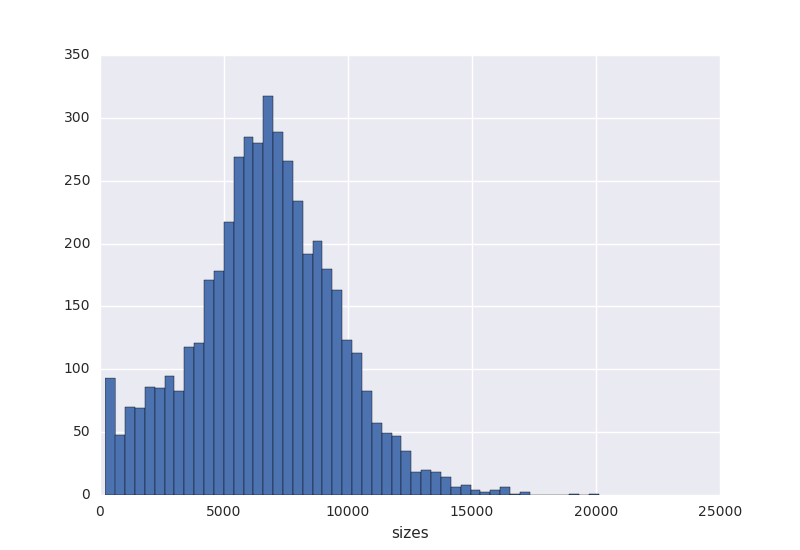

In [5]:
Image(filename=hist_file)

We see a peak at around 7kb which is what we would expect for a nanopore run.  
You should expect the histogram plot to look similar to that of your tapestation prior to your library preparation.
Excessive smaller fragments suggest that unintentional shearing occurred during your library preparation.
Remember that long DNA is fragile :)
We will now look at generating a yield plot, so that we can see the data generated overtime.

In [10]:
yield_file = PLOTS_DIR + SAMPLE_NAME + ".yield.png"
yield_command_options = ["yield_plot"]
yield_command_options.append("--saveas %s" % yield_file)
yield_command_options.append("--plot-type basepairs")
yield_command_options.append(FAST5_DIR)
yield_command = "poretools %s" % ' '.join(yield_command_options)

yield_stderr = subprocess.check_output(yield_command, shell=True, stderr=subprocess.STDOUT)

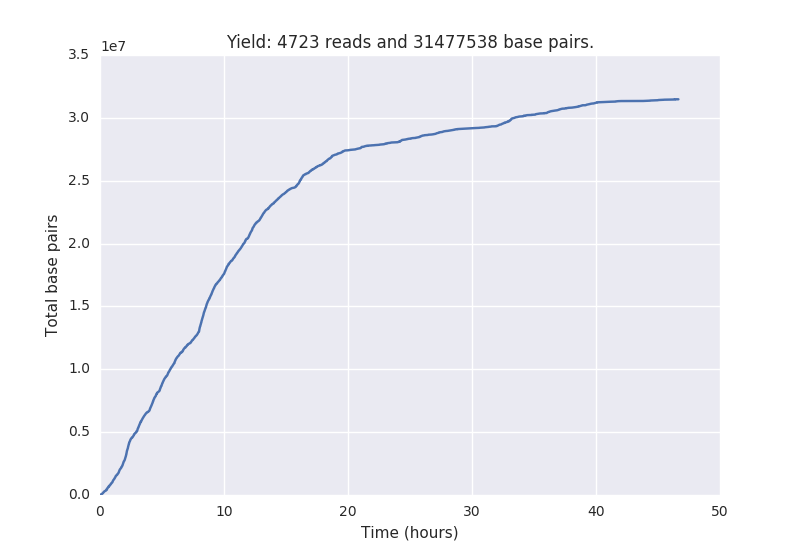

In [11]:
Image(yield_file)

Now let's collect some quantitative stats for our data. We will again use poretools to do this.

In [14]:
stats_file = STATS_DIR + SAMPLE_NAME + ".stats.txt"
stats_command_options = ["stats"]
stats_command_options.append(FAST5_DIR)
stats_command = "poretools %s > %s" % (' '.join(stats_command_options), stats_file)
stats_stderr = subprocess.check_output(stats_command, shell=True, stderr=subprocess.STDOUT)

Now we will use the cat command to print the output of the file to the screen.

In [18]:
stats_output = subprocess.check_output("cat %s" % stats_file, shell=True)

print(stats_output)

What does the N25, N50 and N75 mean in this context?

### Quality Metrics with Poretools

In [33]:
qualpos_file = QUALITY_METRICS_DIR + SAMPLE_NAME + ".qualpos.jpg"
qualpos_command_options = ["qualpos"]
qualpos_command_options.append("--saveas %s" % qualpos_file)
qualpos_command_options.append(FAST5_DIR)

qualpos_command = "poretools %s" % ' '.join(qualpos_command_options)
print(qualpos_command)
qualpos_stderr = subprocess.check_output(qualpos_command, shell=True, stderr=subprocess.STDOUT)

poretools qualpos --saveas /home/Lucatta/jupyter_testing/quality_metrics/2016_08_16_E_COLI_R9.qualpos.jpg /data/Bioinfo/bioinfo-proj-alexis/2016_08_16_E_COLI_R9/reads/downloads/pass/


We will now look at the image generated by qualpos

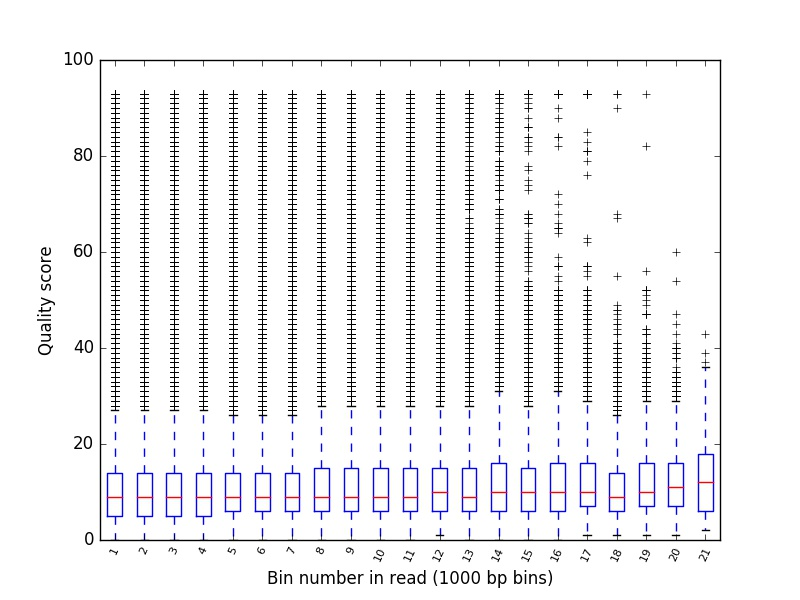

In [34]:
Image(qualpos_file)

### Extracting Fastq data from fast5 files
There are quite a few software packages to do this.
It should be noted that this process can be exceptionally slow.
We incorporate a parallel process here so that we can accelerate the process. If you are unfamiliar with parallel processing, please run through the Jupyter notebook on parallel processing first. Yes, you can run this without doing that, but the following commands won't make much sense and you won't have learned very much.



In [ ]:
### Running Fastqc on the files:


## What the Fast5!

Now that we know the tools required to extract and analyse the data. So far it's all been a bit of magic. Let's have a look inside the fast5 files that hold all the information that we've been plotting.
If you are unfamiliar with exploring hdf5 files in python I suggest you look at the previous tutorial for guidance on some definitions of attributes and datasets etc.

Installed along with anaconda h5py package is many useful command line tools for exploring hdf5 data types. Freeware for all operating systems exists so that the hdf5 file can also be visualised without a commandline interface.

In [12]:
# In a given MinION reads folder, over 100'000 files can exist. 
# This can cause many delays and headaches even for those with experience on the commandline.
# Caution must be taken when entering directories with many folders. Wild characters, such as * can often breakdown
# with so many files in the directory.
# We can play it safe with the pipe symbol and the head command.
print(FAST5_DIR)
p = subprocess.Popen("ls %s | head -n 10" % FAST5_DIR, shell=True, stdout=PIPE, stderr=PIPE)
p.wait()
stdout, stderr = p.communicate()
print(stdout)

/data/Bioinfo/bioinfo-proj-alexis/2016_08_16_E_COLI_R9/reads/downloads/pass/
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1015_strand1.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1026_strand.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1060_strand.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1069_strand.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1078_strand.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1088_strand.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1096_strand1.fast5
AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1127_strand.fast5
AlexisLuc

Using the pipe allows what has been output by the ls command into the head command before the ls has even finished.
Very useful given we only want ten files, not ten thousand! In fact the ls would have been so long that the head command
Finished before the ls command throwing an error which we see below.

In [13]:
print(stderr) # Nothing to worry about.

ls: write error: Broken pipe



In [14]:
# An easy way to handle python files is to store them in an array or dictionary.
# The following command adds the directory onto the start of each filename and stores the file paths in an array

fast5files = [FAST5_DIR + fast5file for fast5file in stdout.splitlines()]

for fast5file in fast5files[0:3]:  # print the first three commands
    print(fast5file)

/data/Bioinfo/bioinfo-proj-alexis/2016_08_16_E_COLI_R9/reads/downloads/pass/AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1015_strand1.fast5
/data/Bioinfo/bioinfo-proj-alexis/2016_08_16_E_COLI_R9/reads/downloads/pass/AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1026_strand.fast5
/data/Bioinfo/bioinfo-proj-alexis/2016_08_16_E_COLI_R9/reads/downloads/pass/AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1060_strand.fast5


We will use the first fast5file to delve into the hdf5 file structure.


In [15]:
fast5file = fast5files[0]
# Firstly we open the fast5 file using a handler. Subsequent analysis will use the handler, not the filename.
f = h5py.File(fast5file)

hdf5 files are a bit like a tree, where our filename is the root.
To see the first set of branches, we use the following:

In [16]:
for group in f:
    print group

Analyses
Raw
UniqueGlobalKey


These names aren't too intuitive. We can use the following command to then list the second set of branches.

In [17]:
for group in f:
    for subgroup in f[group]:
        print "Group: %s \t Subgroup: %s " % (group, subgroup)

Group: Analyses 	 Subgroup: Basecall_1D_000 
Group: Analyses 	 Subgroup: Basecall_2D_000 
Group: Analyses 	 Subgroup: Calibration_Strand_000 
Group: Analyses 	 Subgroup: EventDetection_000 
Group: Analyses 	 Subgroup: Hairpin_Split_000 
Group: Raw 	 Subgroup: Reads 
Group: UniqueGlobalKey 	 Subgroup: channel_id 
Group: UniqueGlobalKey 	 Subgroup: context_tags 
Group: UniqueGlobalKey 	 Subgroup: tracking_id 


Notice how to iterate through a group we need to use the square brackets to indicate which group we are highlighting.
To continue further, we don't add another set of square brackets, but append the subgroup to the group within the current set of brackets. See the example below:

In [18]:
for subsubgroup in f["Analyses/Basecall_1D_000"]:
    print(subsubgroup)

BaseCalled_complement
BaseCalled_template
Configuration
Log
Summary


We can use the id parameter to see if each node is a dataset or another group.

In [19]:
for subsubsubgroup in f["Analyses/Basecall_1D_000"]:
    subsubsubtype = f["Analyses/Basecall_1D_000/%s" % subsubsubgroup].id
    print("%s \t %s" % (subsubsubgroup, subsubsubtype))

BaseCalled_complement 	 <h5py.h5g.GroupID object at 0x7fea4808b140>
BaseCalled_template 	 <h5py.h5g.GroupID object at 0x7fea4808b1e0>
Configuration 	 <h5py.h5g.GroupID object at 0x7fea4808b140>
Log 	 <h5py.h5d.DatasetID object at 0x7fea4808b1e0>
Summary 	 <h5py.h5g.GroupID object at 0x7fea4808b140>


So what else is in the fast5 file?
We'd rather not keep naming variables with infinite subs. Given we don't know how deep this goes, it may be best to generate a recursive list to see an overview of the file structure. Although there exists ways to do this already, by running h5ls on the command line.. why not come up with our own, which is better!

In [20]:
def recursive_list_hdf5(f):
    for name in f:
        path = str(f).split('"')[1]  
        #print(path)
        depth = path.count("/")
        #print(str(f[name]))
        info = str(f[name]).split(" ") # Example: <HDF5 dataset "Events": shape (7063,), type "|V78">
        object_type = info[1]          # Or <HDF5 group "/Analyses/Basecall_1D_000" (5 members)>
        print_order = []
        
        # We need to indent to show directory structure.
        tab_depth = []
        for tab in range(0, depth):
            tab_depth.append("\t\t")
        tab_depth = ''.join(tab_depth)
        
        if object_type == "group":
            object_name = info[2].split("/")[-1] # We only want the last attribute.
            object_member_count = re.sub("\(","", info[-2])  # Always just before the last space
            print_order.append("Name: %s" % re.sub("\"", "", object_name))
            print_order.append("Type: Group")
            print_order.append("Members: %s " % object_member_count)
        elif object_type == "dataset":
            object_name  = re.sub("\"|\"|:$", "", info[2])  # Remove any colons from the end of dataset names.
            object_length = re.sub(",$","", info[4])
            print_order.append("Name: %s" % object_name)
            print_order.append("Type: Dataset")
            print_order.append("Shape: %s" % ''.join(object_length))
        
        print_order = ', '.join(print_order)
        print(tab_depth + print_order)
        
        # A group will have child nodes, so we iterate through these.
        if object_type == "group":
            recursive_list_hdf5(f[name])

In [21]:
recursive_list_hdf5(f)
#for name in f["/Analyses/Basecall_1D_000/BaseCalled_complement"]:
#   print name.parent

Name: Analyses, Type: Group, Members: 5 
		Name: Basecall_1D_000, Type: Group, Members: 5 
				Name: BaseCalled_complement, Type: Group, Members: 2 
						Name: Events, Type: Dataset, Shape: (7063,)
						Name: Fastq, Type: Dataset, Shape: ()
				Name: BaseCalled_template, Type: Group, Members: 2 
						Name: Events, Type: Dataset, Shape: (9736,)
						Name: Fastq, Type: Dataset, Shape: ()
				Name: Configuration, Type: Group, Members: 11 
						Name: aggregator, Type: Group, Members: 0 
						Name: basecall_1d, Type: Group, Members: 0 
						Name: basecall_2d, Type: Group, Members: 0 
						Name: calibration_strand, Type: Group, Members: 0 
						Name: components, Type: Group, Members: 0 
						Name: event_detection, Type: Group, Members: 0 
						Name: general, Type: Group, Members: 0 
						Name: hairpin_align, Type: Group, Members: 0 
						Name: post_processing, Type: Group, Members: 0 
						Name: post_processing.4000Hz, Type: Group, Members: 0 
						Name: split_hairpin, Type: G

Aha! We can find the fastq files under: 
* Analyses/Basecall_2D_000/BaseCalled_2D/Fastq or 
* Analyses/Basecall_1D_000/BaseCalled_complement/Fastq or
* Analyses/Basecall_1D_000/BaseCalled_template/Fastq

Note that for extracting datasets we do something a little different to groups.
Here we go down to the last group the dataset is in then add the dataset name in its own square brakets.
The '[()]' ending allows us to extract the actual dataset, rather than a reference to the dataset.

In [24]:
fastq = f["Analyses/Basecall_1D_000/BaseCalled_complement/"]['Fastq'][()]
fastq = fastq.replace("\\n", "\n")
#print(fastq)

Phoa! You can comment out the print statement above and then re-run to suppress the your output. Extracting fastq data seems quite complex, is fortunate that we have software packages that can extract this data for us. 

<HDF5 file "AlexisLucattini_20160816_FNFAD19879_MN19582_sequencing_run_2016_08_16_E_COLI_R9_99720_ch108_read1015_strand1.fast5" (mode r+)>
